In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from capacity_scaling_oop import solve_with_capacity_scaling, solve_with_linear_programming
from utils import generate_random_graph

%load_ext autoreload
%autoreload 2

23 Node id: 6
5: 4, 2: 10, 4: 7, 3: 2
23.0 True 0 [ 5.  7.  3.  8.  0. 10.  5.  2.  0.  7.  4.  4. 23.]


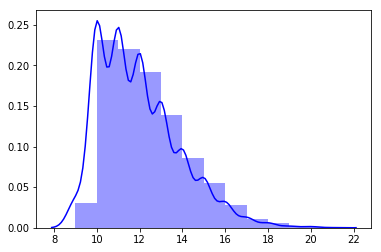

In [2]:
node_count, density = 100, 0.8
distribution='normal'
mean, std, skewness = 10, 3 ,10 
random_numbers, graph = generate_random_graph(node_count,density,distribution,mean,std,skewness)
edges = graph.edge_list
capacities = [t[2] for t in edges]
sns.distplot(capacities,bins=int(max(capacities)-min(capacities)),color='b')
plt.show()


In [3]:
print(solve_with_capacity_scaling(graph)[0])

1027.0 Node id: 6
3: 14.0, 4: 21.0, 5: 11.0, 7: 21.0, 10: 10.0, 12: 11.0, 13: 13.0, 14: 11.0, 15: 10.0, 17: 16.0, 18: 24.0, 23: 24.0, 25: 16.0, 26: 22.0, 27: 22.0, 30: 26.0, 32: 28.0, 34: 25.0, 35: 23.0, 36: 14.0, 39: 10.0, 43: 14.0, 44: 23.0, 45: 11.0, 47: 23.0, 48: 26.0, 49: 23.0, 50: 11.0, 58: 14.0, 59: 15.0, 61: 24.0, 65: 10.0, 67: 11.0, 76: 21.0, 77: 10.0, 79: 12.0, 80: 13.0, 81: 11.0, 85: 12.0, 86: 15.0, 87: 13.0, 90: 11.0, 91: 10.0, 97: 26.0, 98: 23.0, 100: 11.0, 63: 11.0, 64: 10.0, 28: 13.0, 31: 13.0, 22: 11.0, 24: 10.0, 96: 11.0, 38: 12.0, 75: 11.0, 21: 12.0, 60: 10.0, 62: 10.0, 29: 10.0, 33: 11.0, 37: 11.0, 94: 10.0, 68: 11.0, 82: 13.0, 55: 11.0, 83: 12.0, 56: 10.0, 57: 11.0, 51: 9.0, 53: 9.0
1027.0


In [4]:
solve_with_linear_programming(graph)

481.0 True 0 [ 10.  11.  10. ...   0.   0. 481.]
None


In [7]:
%store random_numbers

Stored 'random_numbers' (ndarray)
